<div style="text-align: center;">
  <h1>House Prices - Advanced Regression Techniques</h1>
</div>

## Project Introduction:

In this project, we aim to build a machine learning model to predict housing prices based on various features of the house. This kind of problem falls under regression analysis, where the goal is to predict a continuous value (in this case, the price of a house) based on a set of independent variables. The dataset we are using comes from the Kaggle competition **"House Prices - Advanced Regression Techniques"**.

The project involves several key tasks:

1. **Data Preprocessing**: Cleaning the dataset, handling missing values, encoding categorical variables, and scaling numerical features.
2. **Model Development**: Building and training multiple machine learning models (including Random Forest, Gradient Boosting, XGBoost, and LightGBM).
3. **Hyperparameter Tuning**: Optimizing the models' performance using techniques such as GridSearchCV and RandomizedSearchCV.
4. **Model Evaluation**: Evaluating the performance of the models using metrics such as RMSE (Root Mean Squared Error) and R-squared.
5. **Model Interpretation**: Understanding which features have the most significant impact on the house prices using feature importance analysis.

## Dataset Insights:

The dataset contains 1460 rows and 81 columns (including both numeric and categorical features) related to various aspects of the houses, such as:

* **SalePrice**: The target variable representing the price of the house.
* **OverallQual**: An overall rating of the house (from 1 to 10).
* **GrLivArea**: Above ground living area in square feet.
* **YearBuilt**: Year the house was built.
* **ExterQual**: Exterior quality of the house (rated as Excellent, Good, etc.).
* **GarageCars**: Number of cars the garage can hold.
* **Fireplaces**: Number of fireplaces in the house.
* **MSZoning**: The general zoning classification of the property (e.g., Residential, Commercial).

Some of the features in the dataset are categorical, such as **ExterQual**, **MSZoning**, and **GarageQual**, while others like **GrLivArea** and **OverallQual** are numerical. The goal is to use these features to predict the **SalePrice**.

Overall, the dataset provides a comprehensive set of features to predict house prices, making it a suitable candidate for building a predictive model. By applying various machine learning algorithms and fine-tuning their parameters, we aim to create a model that accurately predicts house prices based on the available features.

___

## 1. Load and Explore the Data

### 1.1 Import Required Libraries:

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

In [2]:
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Machine learning preprocessing libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Machine learning algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [5]:
# Hyperparameter tuning libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score

In [6]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1.2 Load the Datasets:

In [7]:
# Load train dataset
train = pd.read_csv("train.csv")
train.shape

(1460, 81)

In [8]:
# Load test dataset
test = pd.read_csv("test.csv")
test.shape

(1459, 80)

### 1.3 Understand the Dataset:

In [9]:
# Show all columns info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# Display the statistical summary
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# Preview the first few rows of train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 Visualize Sale Price:

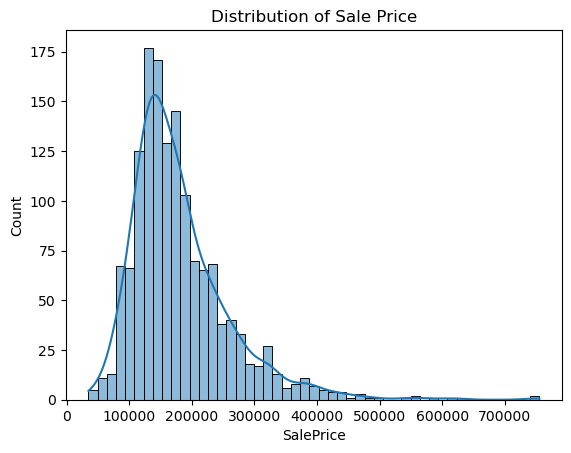

In [12]:
# Plot the target variable 'SalePrice' distribution
sns.histplot(train["SalePrice"], kde = True)
plt.title("Distribution of Sale Price")
plt.show()

## 2. Data Cleaning

### 2.1 Check for Missing Values:

In [13]:
# Check missing values
missing_values = train.isnull().sum().sort_values(ascending = False)
print(missing_values[missing_values > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


### 2.2 Handle Missing Values:

* **Categorical Columns**: Replace missing values with 'None' or the most frequent category.
* **Numerical Columns**: Use median or mean imputation.

In [14]:
# Filling missing garage features
garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
train[garage_cols] = train[garage_cols].fillna('None')

In [15]:
# For GarageYrBlt, missing values mean no garage, fill with '0'
train["GarageYrBlt"].fillna(0, inplace = True)

In [16]:
# Filling missing basement features
basement_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
train[basement_cols] = train[basement_cols].fillna('None')

In [17]:
# MasVnrType: Fill missing values with 'None', assuming no masonry vaneer
train['MasVnrType'].fillna('None', inplace = True)

In [18]:
# Fill missing LotFrontage by the median value of the same neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [19]:
# MasVnrArea: Fill missing values with 0, assuming no masonry veneer
train['MasVnrArea'].fillna(0, inplace = True)

In [20]:
# 'Electrical' column has only one missing value, fill it with the mode
train["Electrical"].fillna(train["Electrical"].mode()[0], inplace = True)

In [21]:
# fill the missing values with the most frequent category in FireplaceQu
most_frequent = train['FireplaceQu'].mode()[0]
train['FireplaceQu'].fillna(most_frequent, inplace=True)

### 2.3 Remove Columns with Too Many Missing Values:

* Drop columns like **'PoolQC'**, **'MiscFeature'**, or those with very few non-null values.

In [22]:
# Drop columns with too many missing values
drop_columns = ["PoolQC", "MiscFeature", "Alley", "Fence"]
train.drop(columns = drop_columns, axis = 1, inplace = True)

### 2.4 Drop Irrelevant Columns:

* Columns like **Id** may not provide predictive power.

In [23]:
# Drop irrelevant column 'Id'
train = train.drop("Id", axis = 1)

In [24]:
# Check again for missing values
train.isnull().sum().sum()

0

## 3. Exploratory Data Analysis (EDA)

### 3.1 Correlation Analysis:

<Axes: >

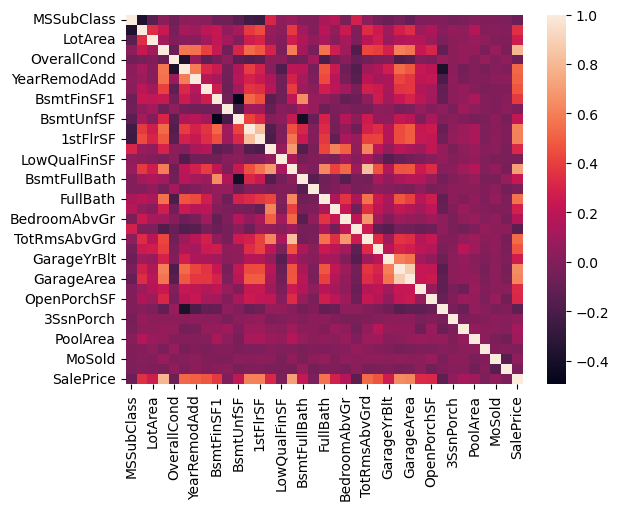

In [25]:
# Create a heatmap to visualize the correlation matrix
correlation = train.corr()
sns.heatmap(correlation, annot = False)

In [26]:
# Calculate correlation of all features with 'SalePrice' and sort them
important_features = correlation["SalePrice"].sort_values(ascending = False)
print(important_features)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [27]:
# Descriptive statistics summary for 'SalePrice'
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [28]:
# Display the skewness and kurtosis for 'SalePrice'
print("Skewness: %f" % train["SalePrice"].skew())
print("Kurtosis: %f" % train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### 3.3 Plot Relationship with Numerical Variables:

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

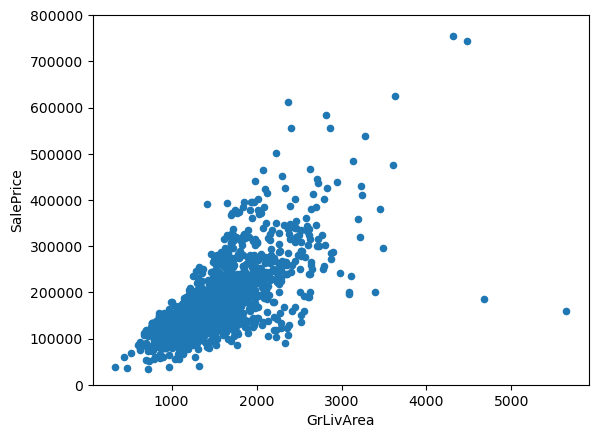

In [29]:
# Plot scatter plot of 'GrLivArea' vs. 'SalePrice'
var = "GrLivArea"
data = pd.concat([train["SalePrice"], train[var]], axis = 1)
data.plot.scatter(x = var, y = "SalePrice", ylim = (0, 800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

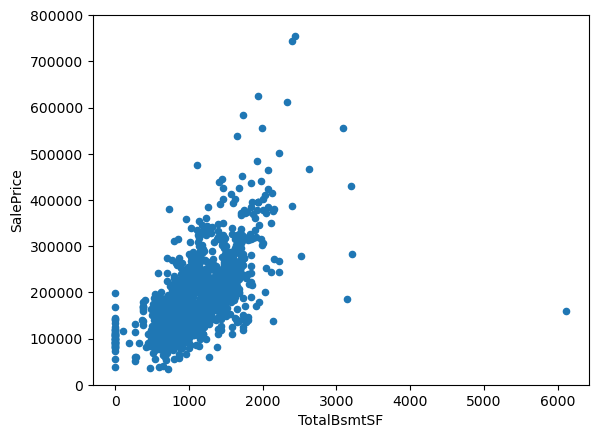

In [30]:
# Plot scatter plot of 'TotalBsmtSF' vs. 'SalePrice'
var = "TotalBsmtSF"
data = pd.concat([train["SalePrice"], train[var]], axis = 1)
data.plot.scatter(x = var, y = "SalePrice", ylim = (0, 800000))

### 3.4 Plot Relationship with Categorical Features:

(-0.5, 9.5, 0.0, 800000.0)

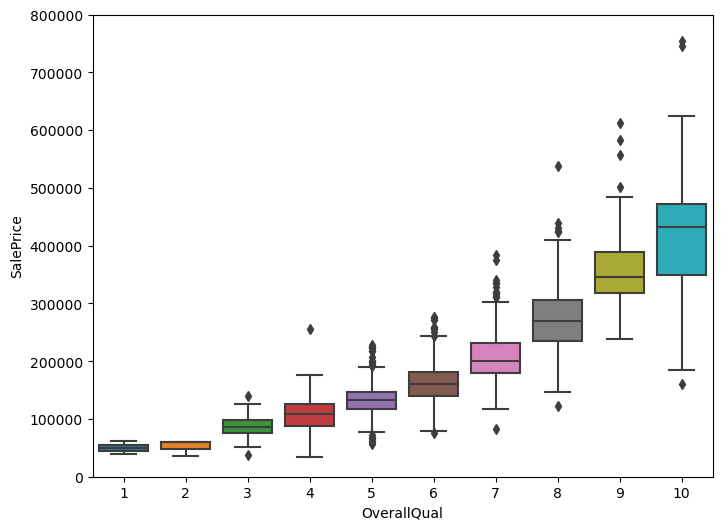

In [31]:
# Plot box plot 'OverallQual' vs. 'SalePrice'
var = 'OverallQual'
data = pd.concat([train["SalePrice"], train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000)

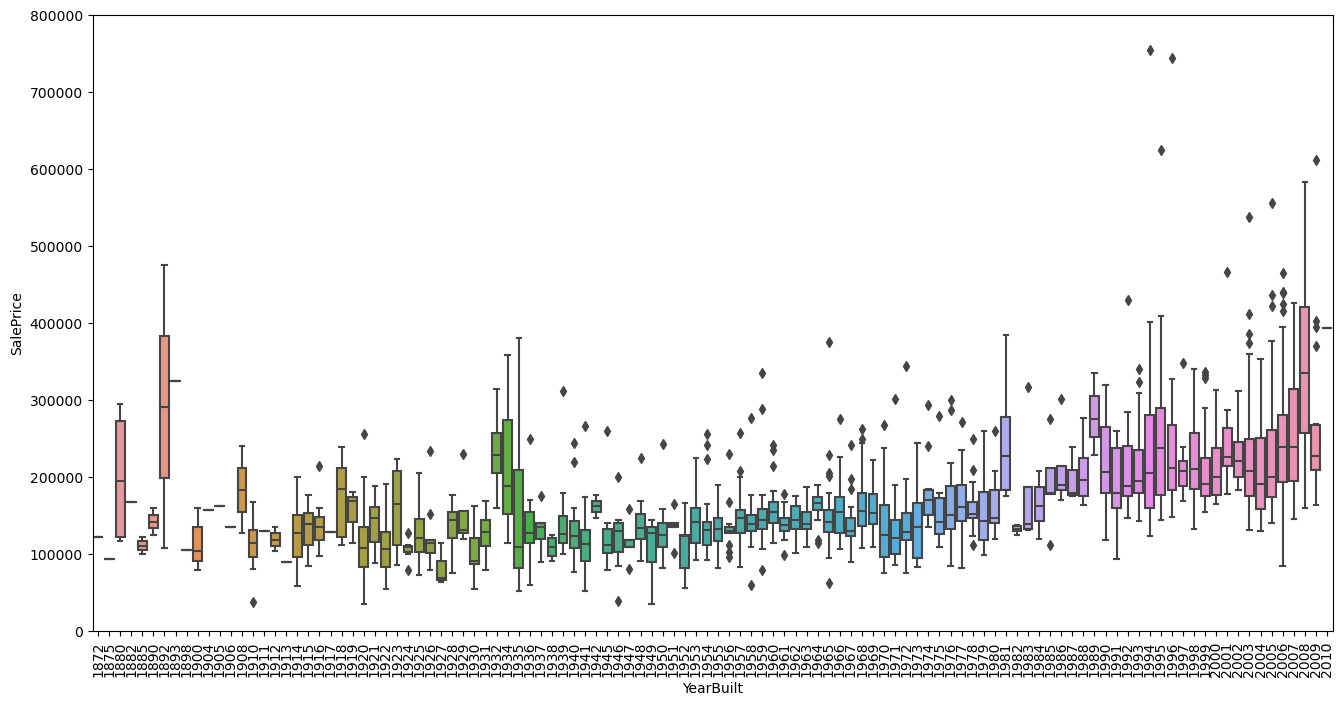

In [32]:
# Plot box plot 'YearBuilt' vs. 'SalePrice'
var = "YearBuilt"
data = pd.concat([train["SalePrice"], train[var]], axis=1)

# Create a box plot
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x=var, y="SalePrice", data=data, ax=ax)

# Set the axis limits
ax.axis(ymin=0, ymax=800000)

plt.xticks(rotation=90)
plt.show()

### 3.5 Scatter Plots between 'SalePrice' and Correlated variables:

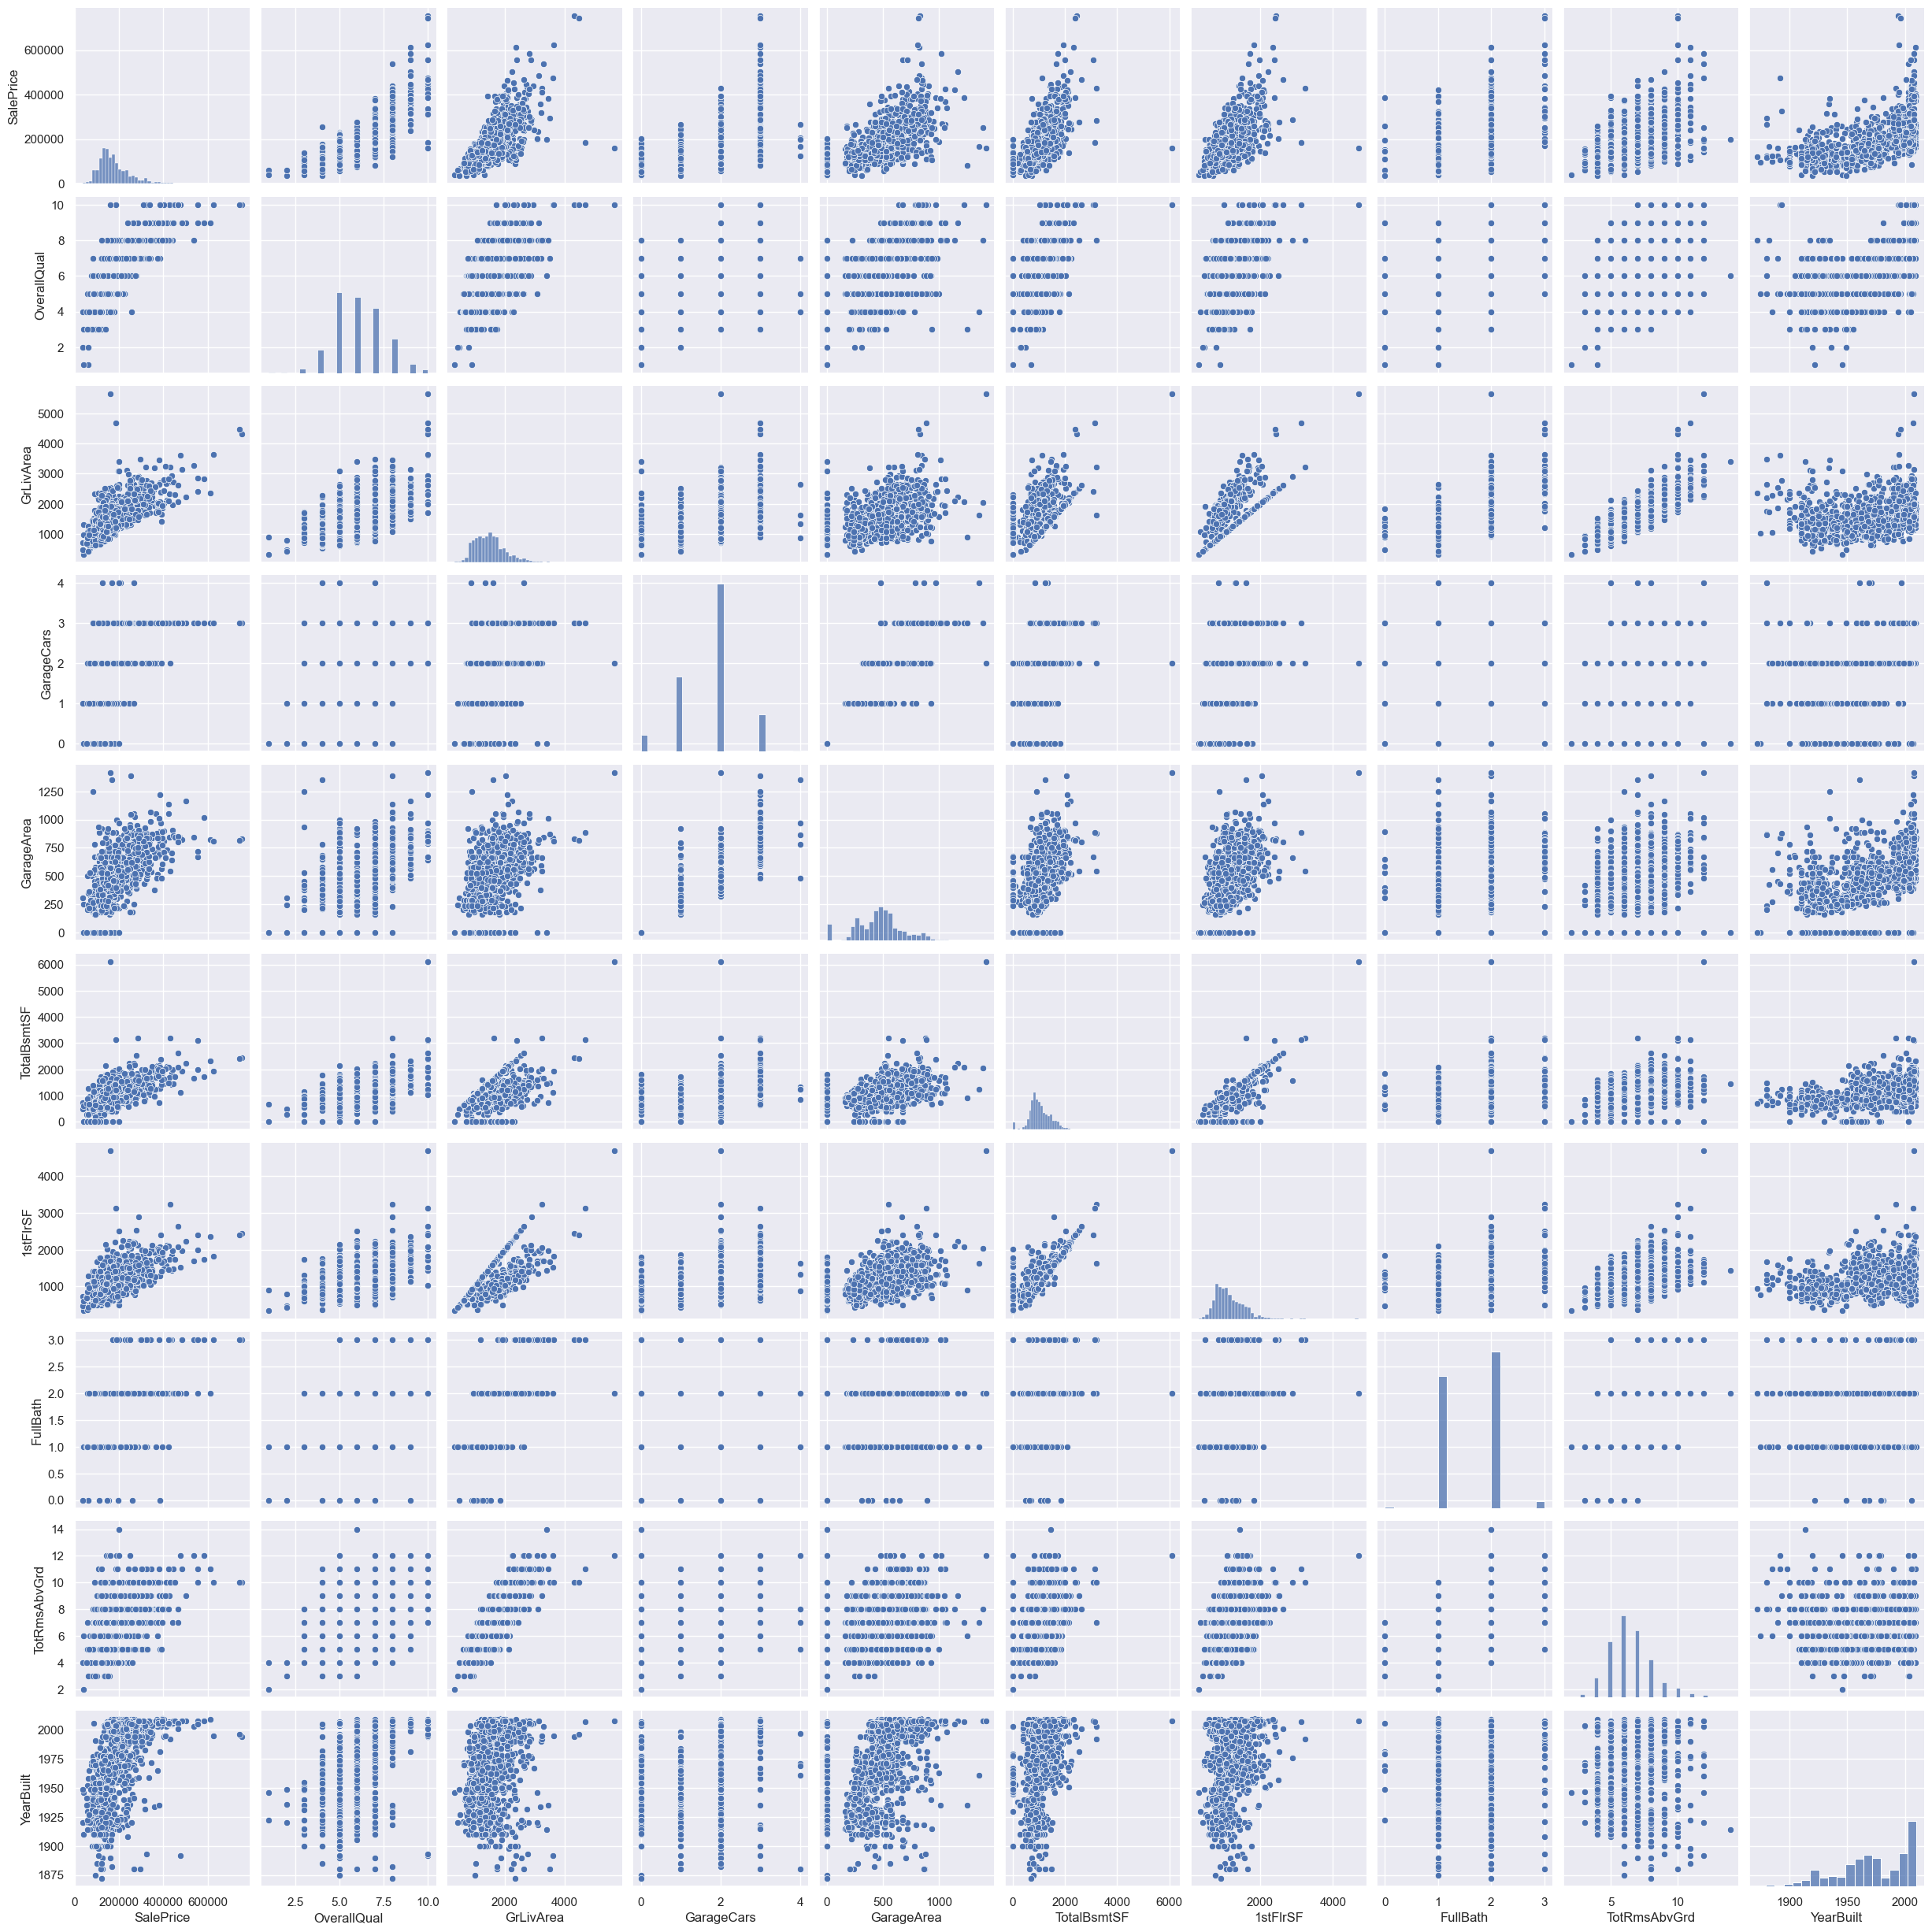

In [33]:
# Plot all scatter plots between 'SalePrice' and correlated variables
sns.set()
cols = [
    "SalePrice", "OverallQual", "GrLivArea", "GarageCars", 
    "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath",
    "TotRmsAbvGrd", "YearBuilt"]
sns.pairplot(train[cols], size = 2.5)
plt.show()

## 4. Feature Engineering

### 4.1 Transform Skewed Features:

* Use logarithmic transformation on skewed numerical features

In [34]:
# Apply log transformation to the 'SalePrice' column to handle skewed data and normalize the distribution
train["SalePrice"] = np.log1p(train["SalePrice"])

### 4.2 Encode Categorical Variables:

* Use **LabelEncoder** for categorical variables

In [35]:
# Encode categorical variables
train = pd.get_dummies(train, drop_first = True)

In [36]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [37]:
# List of columns to be label encoded (ordinal categorical variables)
ordinal_cols = ["OverallQual", "FullBath"]

In [38]:
# Apply label ecoding to the selected columns
for col in ordinal_cols:
    train[col] = label_encoder.fit_transform(train[col])

### 4.3 Feature Scaling with MinMaxScaler and StandardScaler:

* Use **MinMaxScaler** and **StandardScalet** for feature scaling variables.

In [39]:
# Min-Max scaling for related columns
scaler = MinMaxScaler()
train[["LotFrontage", "GrLivArea", "SalePrice"]] = scaler.fit_transform(train[["LotFrontage", "GrLivArea", "SalePrice"]])

In [40]:
# Standard scaling for related columns
scaler = StandardScaler()
train[["BsmtFinSF1", "BsmtFinSF2", "HalfBath"]] = scaler.fit_transform(train[["BsmtFinSF1", "BsmtFinSF2", "HalfBath"]])

## 5. Split Data for Train and Test

In [41]:
# Define the features (X) and target (y)
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

In [42]:
# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
# Check the shapes of the resulting set
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1168, 245)
Testing data shape: (292, 245)


## 6. Model Building

### 6.1 Linear Regression (Baseline Model):

In [44]:
# Initialize the model
lr_model = LinearRegression()

In [45]:
# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predict on validation data
y_pred_lr = lr_model.predict(X_test)

In [47]:
# Evaluate performance
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared = False)
print(f"Random Forest RMSE: {rmse_lr}")

Random Forest RMSE: 0.06845590633005326


### 6.2 Random Forest Regressor:

In [48]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [49]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
# Predict on validation data
y_pred_rf = rf_model.predict(X_test)

In [51]:
# Evaluate performance
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared = False)
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest RMSE: 0.04788013405635774


### 6.3 Gradient Boosting Regressor:

In [52]:
# Initiate the model
gbr_model = GradientBoostingRegressor(n_estimators = 100, random_state = 42)

In [53]:
# Train the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [54]:
# Predict on validation model
y_pred_gbr = gbr_model.predict(X_test)

In [55]:
# Evaluate performance
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared = False)
print(f"Gradient Boosting RMSE: {rmse_gbr}")

Gradient Boosting RMSE: 0.045291067743638794


### 6.4 XGBoost Regressor:

In [56]:
# Initialize the model
xgb_model = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.05, max_depth = 6, random_state = 42)

In [57]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [58]:
# Predict on validation data
y_pred_xgb = xgb_model.predict(X_test)

In [59]:
# Evaluate performance
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared = False)
print(f"XGBoost RMSE: {rmse_xgb}")

XGBoost RMSE: 0.047846270884437304


### 6.5 LightGBM:

In [60]:
# Initialize the model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate = 0.05, max_depth = 6, random_state = 42)

In [61]:
# Train the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3158
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 161
[LightGBM] [Info] Start training from score 0.510827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMRegressor(learning_rate=0.05, max_depth=6, random_state=42)

In [62]:
# Predict on validation data
y_pred_lgb = lgb_model.predict(X_test)

In [63]:
# Evaluate performance
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared = False)
print(f"LightGBM RMSE: {rmse_lgb}")

LightGBM RMSE: 0.04555631440032374


## 7. Hyperparameter Tuning

### 7.1 Random Forest Hyperparameter Tuning using GridSearchCV:

In [64]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

In [65]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2)

In [66]:
# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [67]:
# Get the best parameters and the best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best RMSE for Random Forest:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE for Random Forest: 0.8610487203106502


### 7.2 Gradient Boosting Hyperparameter Tuning using RandomizedSearchCV:

In [68]:
# Define the parameter grid for Gradient Boosting
param_dist_gbr = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [69]:
# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search_gbr = RandomizedSearchCV(estimator = gbr_model, param_distributions = param_dist_gbr, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1)

In [70]:
# Fit RandomizedSearchCV
random_search_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=2)

In [71]:
# Get the best parameters and the best score
print("Best Parameters for Gradient Boosting:", random_search_gbr.best_params_)
print("Best RMSE for Gradient Boosting:", random_search_gbr.best_score_)

Best Parameters for Gradient Boosting: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
Best RMSE for Gradient Boosting: 0.8868638967200427


### 7.3 XGBoost Hyperparameter Tuning using GridSearchCV:

In [72]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [73]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator = xgb_model, param_grid = param_grid_xgb, cv = 5, n_jobs = -1, verbose = 2)

In [74]:
# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END 

[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_sp

[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=

[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_spli

[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_

[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_spl

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.05, m...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=2)

In [75]:
# Get the best parameters and the best score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best RMSE for XGBoost:", grid_search_xgb.best_score_)

Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.9}
Best RMSE for XGBoost: 0.8908047406417475


### 7.4 LightGBM Hyperparameter Tuning using RandomizedSearchCV:

In [76]:
# Define the parameter grid for LightGBM
param_dist_lgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'num_leaves': [31, 50, 70],
    'min_data_in_leaf': [20, 40, 60]
}

In [77]:
# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search_lgb = RandomizedSearchCV(estimator = lgb_model, param_distributions = param_dist_lgb, n_iter = 10, cv = 5, verbose = 2, n_jobs = -1)

In [78]:
# Fit RandomizedSearchCV
random_search_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, n_estimators=150, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, n_estimators=150, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=150, subsample=0.9; total time=   1.4s
[CV] EN

[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=150, s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(learning_rate=0.05, max_depth=6,
                                           random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'min_data_in_leaf': [20, 40, 60],
                                        'n_estimators': [50, 100, 150],
                                        'num_leaves': [31, 50, 70]},
                   verbose=2)

In [79]:
# Get the best parameters and the best score
print("Best Parameters for LightGBM:", random_search_lgb.best_params_)
print("Best RMSE for LightGBM:", random_search_lgb.best_score_)

Best Parameters for LightGBM: {'num_leaves': 70, 'n_estimators': 150, 'min_data_in_leaf': 20, 'max_depth': 5, 'learning_rate': 0.1}
Best RMSE for LightGBM: 0.8835203939698133


A summary of findings after **yperparameter Tuning**:

1. **Random Forest**: Best RMSE: 0.861
2. **Gradient Boosting**: Best RMSE: 0.884
3. **XGBoost: Best RMSE**: 0.891
4. **LightGBM: Best RMSE**: 0.879

## 8. Cross Validation

In [80]:
# Initialize the models with the best hyperparameters
rf_model = RandomForestRegressor(bootstrap = True, max_depth = 15, min_samples_leaf = 1, 
                                  min_samples_split = 2, n_estimators = 100, random_state = 42)

In [81]:
# Initialize the Gradient Boosting model with the best hyperparameters
gb_model = GradientBoostingRegressor(n_estimators = 150, min_samples_split = 5, min_samples_leaf = 4, 
                                     max_depth = 3, learning_rate = 0.1, random_state=42)

In [82]:
# Initialize the XGBoost model with the best hyperparameters
xgb_model = xgb.XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 3, 
                             n_estimators = 150, subsample = 0.9, random_state = 42)

In [83]:
# Initialize the LightGBM model with the best hyperparameters
lgb_model = lgb.LGBMRegressor(num_leaves = 70, n_estimators = 100, min_data_in_leaf = 20, 
                              max_depth = 3, learning_rate = 0.1, random_state = 42)

In [84]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_cv_scores)
print(f"Random Forest Cross-Validation RMSE: {rf_rmse_scores.mean()} ± {rf_rmse_scores.std()}")

Random Forest Cross-Validation RMSE: 0.047008917318872835 ± 0.006437499806655972


In [85]:
# Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
gb_rmse_scores = np.sqrt(-gb_cv_scores)
print(f"Gradient Boosting Cross-Validation RMSE: {gb_rmse_scores.mean()} ± {gb_rmse_scores.std()}")

Gradient Boosting Cross-Validation RMSE: 0.042941877109153405 ± 0.005316844283587048


In [86]:
# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
xgb_rmse_scores = np.sqrt(-xgb_cv_scores)
print(f"XGBoost Cross-Validation RMSE: {xgb_rmse_scores.mean()} ± {xgb_rmse_scores.std()}")

XGBoost Cross-Validation RMSE: 0.04165317232810314 ± 0.00557687674305669


In [87]:
# Cross-validation for LightGBM
lgb_cv_scores = cross_val_score(lgb_model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
lgb_rmse_scores = np.sqrt(-lgb_cv_scores)
print(f"LightGBM Cross-Validation RMSE: {lgb_rmse_scores.mean()} ± {lgb_rmse_scores.std()}")

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2979
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 153
[LightGBM] [Info] Start training from score 0.510390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

A summary of the performance in terms of **RMSE**:

1. **Random Forest**: 0.0470 ± 0.0064
2. **Gradient Boosting**: 0.0429 ± 0.0053
3. **XGBoost**: 0.0417 ± 0.0056
4. **LightGBM**: 0.0440 ± 0.0053

From these results, **XGBoost** has the lowest mean RMSE, followed closely by **Gradient Boosting**. These two models seem to outperform **Random Forest** and **LightGBM** in terms of RMSE.

## 9. Model Evaluation

Since the **XGBoost** has the best performance, we would choose **XGBoost** as the best model to evaluate

In [88]:
# Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [89]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [90]:
# Calculate RMSE for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")

XGBoost RMSE: 0.042645121867653304


In [91]:
# Calculate R² score for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R² Score: {r2_xgb}")

XGBoost R² Score: 0.9078984885500565


We Visualize how well the model is performing by plotting the actual vs predicted values.

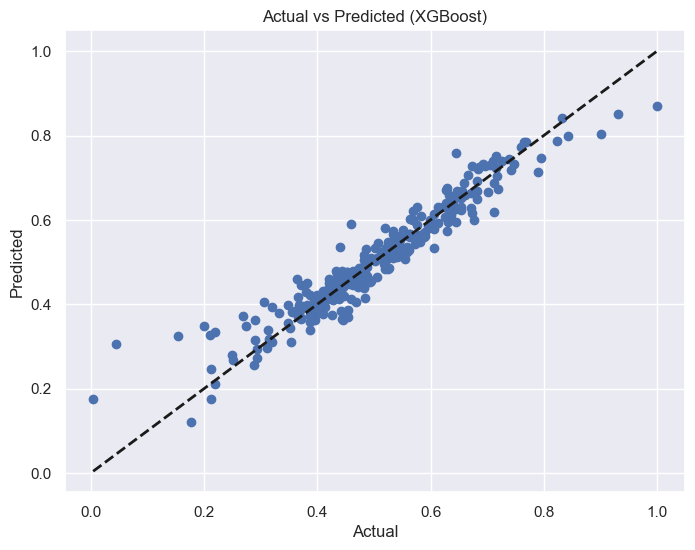

In [92]:
# Plot actual vs predicted
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (XGBoost)')
plt.show()

To gain insights into how the model is making decisions, we visualize the feature importance.

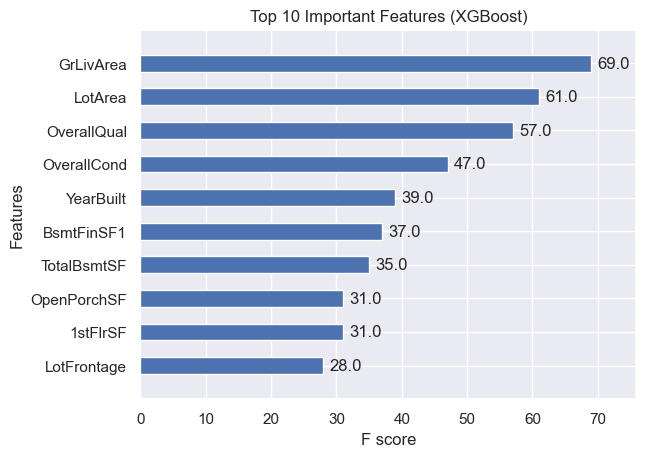

In [93]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type = 'weight', max_num_features = 10, height = 0.5)
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

## 10. Model Interpretation

In [94]:
# Extract feature importance from the trained XGBoost model
importance = xgb_model.feature_importances_

In [95]:
# Get the feature names from the training data
feature_names = X_train.columns

In [96]:
# Create a DataFrame to hold feature names and their corresponding importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

In [97]:
# Sort the DataFrame by the 'Importance' column in descending order
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

In [98]:
# Print the top 10 most important features
print(importance_df.head(10))

              Feature  Importance
200    KitchenQual_TA    0.156632
25         GarageCars    0.122266
3         OverallQual    0.102495
150      ExterQual_TA    0.080649
15          GrLivArea    0.046214
23         Fireplaces    0.038459
39        MSZoning_RM    0.037942
224     GarageQual_TA    0.029660
5           YearBuilt    0.029256
219  GarageFinish_Unf    0.026186


The top 10 most important features based on **XGBoost** model's feature importance are:

1. **KitchenQual_TA** (23.39%)
2. **GarageCars**	(18.26%)
3. **OverallQual**	(15.30%)
4. **ExterQual_TA**	(12.04%)
5. **GrLivArea**	(6.90%)
6. **Fireplaces**	(5.74%)
7. **MSZoning_RM**	(5.67%)
8. **GarageQual_TA**	(4.43%)
9. **YearBuilt**	(4.37%)
10. **GarageFinish_Unf**	(3.91%)

## 11. Conclusion

The XGBoost model has successfully identified key features that significantly influence house prices in this dataset. Based on feature importance, we can conclude the following:

1. **KitchenQual_TA** stands out as the most important feature, contributing 23.39% to the model's prediction. This suggests that the quality of the kitchen has a major impact on house pricing.

2. **GarageCars** and **OverallQual** follow closely with 18.26% and 15.30%, indicating that the number of garage spaces and the overall quality of the house are also strong predictors of house price.

3. Other features like **ExterQual_TA**, **GrLivArea**, and **Fireplaces** also show considerable importance, with contributions ranging from 5% to 12%. These highlight that factors like external quality, living area, and the presence of fireplaces influence the predicted price.

4. **Features like **MSZoning_RM**, **GarageQual_TA**, and **GarageFinish_Unf** contribute moderately, showing that zoning and garage characteristics also play a role in pricing.

Overall, the model's feature importance shows that both structural and aesthetic attributes, such as kitchen quality and overall house condition, are key drivers of house pricing. Understanding these can help in making informed decisions about property valuations.

### Submission for kaggle

In [99]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [100]:
submission = test[["Id"]]
submission

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [101]:
submission = submission.iloc[:len(predictions)]
submission["SalePrice"] = predictions

In [102]:
submission

,Id,SalePrice
0,1461,0.453291
1,1462,0.735574
2,1463,0.385932
3,1464,0.510180
4,1465,0.721611
...,...,...
287,1748,0.444525
288,1749,0.647420
289,1750,0.540963
290,1751,0.356638


In [103]:
submission.to_csv("submission.csv")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<div style="text-align: center;">
  <h1>-END-</h1>
</div>